# Metodologia Utilizada en el proyecto es CRISP-DM


1.   **Fase I. Business Understanding. Definición de necesidades del cliente (comprensión del negocio):** Esta fase inicial se enfoca en la comprensión de los objetivos de proyecto. Después se convierte este conocimiento de los datos en la definición de un problema de minería de datos y en un plan preliminar diseñado para alcanzar los objetivos.
2.   **Fase II. Data Understanding. Estudio y comprensión de los datos :** La fase de entendimiento de datos comienza con la colección de datos inicial y continúa con las actividades que permiten familiarizarse con los datos, identificar los problemas de calidad, descubrir conocimiento preliminar sobre los datos, y/o descubrir subconjuntos interesantes para formar hipótesis en cuanto a la información oculta.
3.   **Fase III. Data Preparation. Análisis de los datos y selección de características :** La fase de preparación de datos cubre todas las actividades necesarias para construir el conjunto final de datos (los datos que se utilizarán en las herramientas de modelado) a partir de los datos en bruto iniciales. Las tareas incluyen la selección de tablas, registros y atributos, así como la transformación y la limpieza de datos para las herramientas que modelan.
4. **Fase IV. Modeling. Modelado :** En esta fase, se seleccionan y aplican las técnicas de modelado que sean pertinentes al problema (cuantas más mejor), y se calibran sus parámetros a valores óptimos. Típicamente hay varias técnicas para el mismo tipo de problema de minería de datos. Algunas técnicas tienen requerimientos específicos sobre la forma de los datos. Por lo tanto, casi siempre en cualquier proyecto se acaba volviendo a la fase de preparación de datos.
5. **Fase V. Evaluation. Evaluación (obtención de resultados) :** En esta etapa en el proyecto, se han construido uno o varios modelos que parecen alcanzar calidad suficiente desde la una perspectiva de análisis de datos.
Antes de proceder al despliegue final del modelo, es importante evaluarlo a fondo y revisar los pasos ejecutados para crearlo, comparar el modelo obtenido con los objetivos de negocio. Un objetivo clave es determinar si hay alguna cuestión importante de negocio que no haya sido considerada suficientemente. Al final de esta fase, se debería obtener una decisión sobre la aplicación de los resultados del proceso de análisis de datos.
6. **Fase VI. Deployment. Despliegue (puesta en producción) :** Generalmente, la creación del modelo no es el final del proyecto. Incluso si el objetivo del modelo es de aumentar el conocimiento de los datos, el conocimiento obtenido tendrá que organizarse y presentarse para que el cliente pueda usarlo. Dependiendo de los requisitos, la fase de desarrollo puede ser tan simple como la generación de un informe o tan compleja como la realización periódica y quizás automatizada de un proceso de análisis de datos en la organización.
<img src='https://healthdataminer.com/wp-content/uploads/2019/11/800px-CRISP-DM_Process_Diagram.png' width=50%, height=20%>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import VarianceThreshold
#encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
#fin encoder
%matplotlib inline
sns.set(color_codes=True)

# 1. Comprensión del Negocio
El negocio presente en este caso trata del banco conocido como Monopoly, el cual lleva muchos años atendiendo a sus clientes en Chile y que recientemente fue adquirido por un banco el cual tiene capitales extranjeros conocido como Dormammu. Se ha solicitado el hacer estudios sobre los clientes del banco Monopoly, con la finalidad de estudiar el comportamiento y detectar patrones, además de analizar cómo será la estrategia para abordar a estos nuevos clientes. De esta manera se ha extraído una base de datos, la cual contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente. Estos datos deben ser analizados y limpiados, además de seleccionar variables las cuales sirvan para realizar una interpretación y entregar la mayor información posible a los dueños del banco, para que estos puedan conocer mejor a los clientes, junto con preparar una estrategia y abordar este nuevo mercado.

# 2. Comprensión de los datos

In [ ]:
from pandas.io.excel import ExcelFile
Excel = ExcelFile('/content/CasoBancoMonopolyDormammu.xlsx')
df = Excel.parse('Hoja1')

In [ ]:
#con la siguiente funcion se verifica que los datos se cargaron correctamente y se solicitaron las 10 primeras filas.
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


# Analisis de los atributos del conjunto de datos y sus dimensiones

In [ ]:
#Cantidad de filas y columnas.
df.shape

(51124, 574)

In [ ]:
#Tipos de datos que tienen las columnas.
df.dtypes

Id               int64
Subsegmento      int64
Sexo            object
Region         float64
Edad             int64
                ...   
UsoL1_T01      float64
UsoL2_T01        int64
UsoLI_T01      float64
IndRev_T01      object
target           int64
Length: 574, dtype: object

In [ ]:
#Nombre de las columnas.
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

In [ ]:
#Estadistica descritiva para las columnas numericas.
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,4.416549e+04,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,1.081146e+05,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,4.270700e+04,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.908574e+06,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000


# Seleccion de muestra y analisis de las variables numericas.
Seleccionamos las columnas desde Subsegmento hasta UsoLI_T12 y agregamos la columna Target Con el fin de poder encontrar algunas relacion con Target que corresponde si ha pagado y no.

In [ ]:
columnas = ['Id','Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
       'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
       'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12',
       'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12',
       'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12',
       'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12','target']

In [ ]:
df2 = df.filter(columnas)
df2.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,0.0,22000.0,0.0,702168.0,0.0,731768.0,25890.0,0.0,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,0.0,250000.0,0.0,244876.0,0.0,244876.0,284632.0,0.0,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,0.0,29990.0,0.0,94415.0,0.0,94415.0,0.0,0.0,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,0.0,80000.0,0.0,358807.0,0.0,358807.0,14660.0,0.0,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,0.0,236467.0,0.0,233331.0,0.0,67516.0,234211.0,0.0,0


In [ ]:
df2.shape

(51124, 67)

In [ ]:
df2.isnull().sum()

Id                0
Subsegmento       0
Sexo              1
Region           53
Edad              0
               ... 
EeccInt_T12    8251
UsoL1_T12      8251
UsoL2_T12      8251
UsoLI_T12      8251
target            0
Length: 67, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66ef23b1d0>,
      dtype=object)

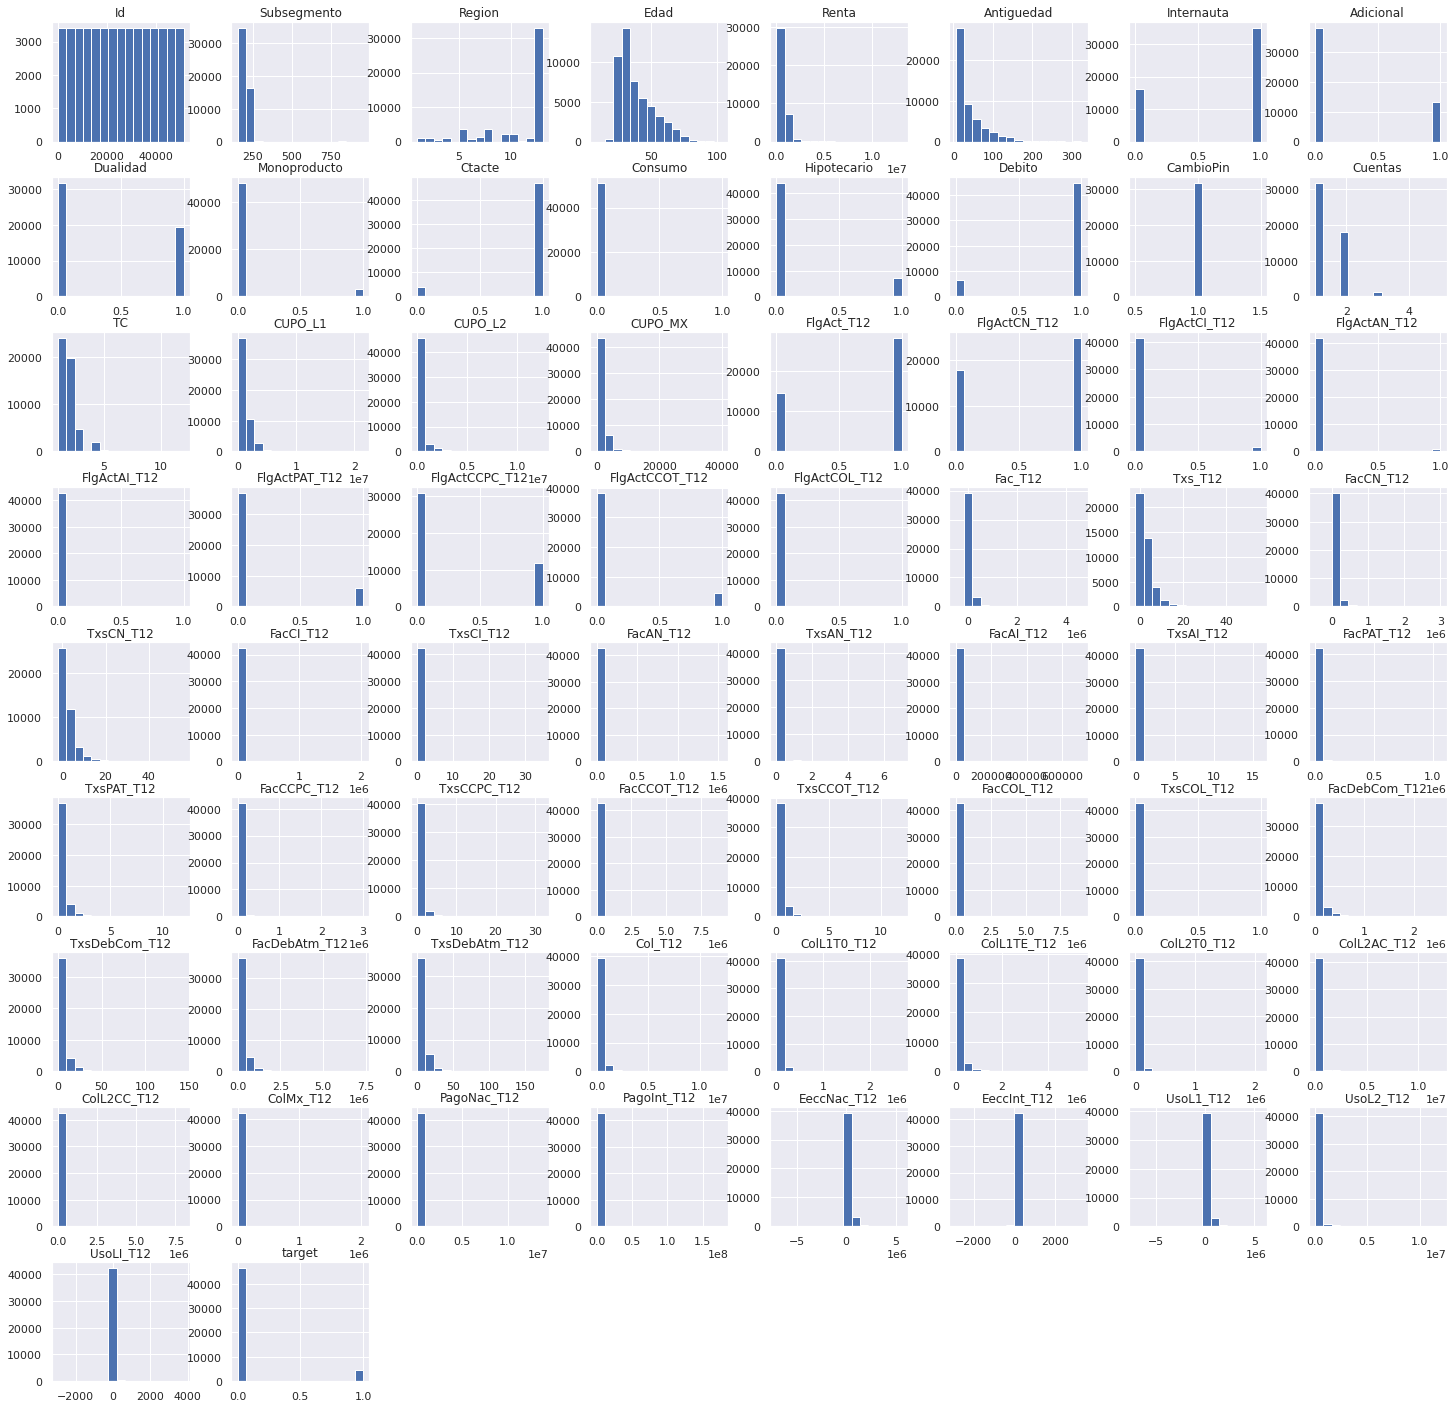

In [ ]:
df2.hist(figsize=(25,25), bins = 15)

In [ ]:
df2.describe(include='object').T

,count,unique,top,freq
Sexo,51123,2,H,27410


Text(0.5, 0, 'Cantidad total')

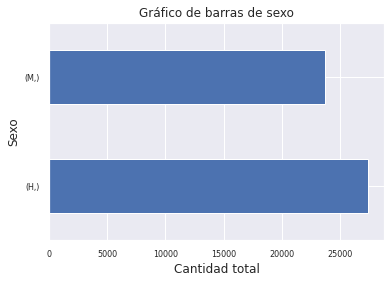

In [ ]:
columnas_object = df2.select_dtypes(include=['object']).columns

df2[columnas_object].value_counts().plot.barh()
plt.title('Gráfico de barras de sexo')
plt.tick_params(labelsize = 8)
plt.xlabel("Cantidad total")

0    46524
1     4600
Name: target, dtype: int64


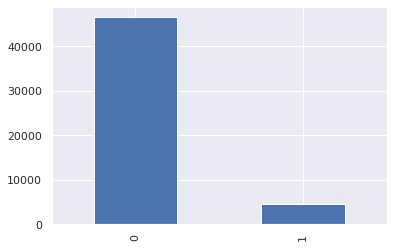

In [ ]:
#Chequeamos en balance de las etiquetas de los datos
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df2["target"].map(lambda x: color_wheel.get(x + 1))
print(df2.target.value_counts())
p=df2.target.value_counts().plot(kind="bar")

En cuanto a variables cualitativas, anteriormente se contemplo que solamente hay una variable, con esta se decidió realizar un análisis sobre la variable Sexo, la cual se conforma de H = Hombre y M = Mujer. Con esto queremos ver cómo están divididos los datos, ver cuál tiene mayor cantidad de registros para posteriormente escoger la forma de imputación más adecuada si se encuentran datos nulos

# Analisis de datos nulos y duplicados
Antes de realizar algunos tratamientos sobre ellos ya sea eliminarlos o imputarlos se debe analizar cuales y cuantos de estos datos contamos de la base de datos.

In [ ]:
#filas con información duplicada
filas_duplicadas = df2[df2.duplicated()]
print('Cantida de filas duplicadas:', filas_duplicadas.shape)

Cantida de filas duplicadas: (0, 67)


In [ ]:
df2.count()

Id             51124
Subsegmento    51124
Sexo           51123
Region         51071
Edad           51124
               ...  
EeccInt_T12    42873
UsoL1_T12      42873
UsoL2_T12      42873
UsoLI_T12      42873
target         51124
Length: 67, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              51124 non-null  int64  
 1   Subsegmento     51124 non-null  int64  
 2   Sexo            51123 non-null  object 
 3   Region          51071 non-null  float64
 4   Edad            51124 non-null  int64  
 5   Renta           37759 non-null  float64
 6   Antiguedad      51124 non-null  int64  
 7   Internauta      51124 non-null  int64  
 8   Adicional       51124 non-null  int64  
 9   Dualidad        51124 non-null  int64  
 10  Monoproducto    51124 non-null  int64  
 11  Ctacte          51124 non-null  int64  
 12  Consumo         51124 non-null  int64  
 13  Hipotecario     51124 non-null  int64  
 14  Debito          51124 non-null  int64  
 15  CambioPin       31736 non-null  float64
 16  Cuentas         51124 non-null  int64  
 17  TC              51124 non-null 

# 3. Preparacion de los datos

In [ ]:
def simpleImputer(column, data_fill):
  df2[column] = df2[column].fillna(data_fill)
  return print("\033[4;32m"+'imputación realizada con éxito. DataFrame Actualizado!')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66f9f8a610>]],
      dtype=object)

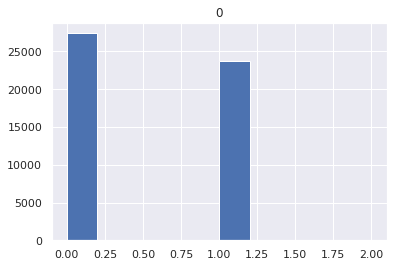

In [ ]:
#Limpiando los datos de sexo (simpleimputer)
le = preprocessing.LabelEncoder()
muestra_sexo = df2['Sexo'].replace(np.nan, 'none', regex=True)#.replace porque requerimos de string o number para el label encoder.

muestra_sexo_le = le.fit_transform(muestra_sexo)

pd.DataFrame(muestra_sexo_le).hist()

In [ ]:
simpleImputer('Sexo', 'H')

imputación realizada con éxito. DataFrame Actualizado!


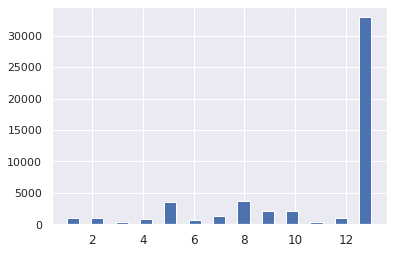

In [ ]:
#Region (simpleimputer)
df2['Region'].hist(xlabelsize=12, bins=25)

In [ ]:
simpleImputer('Region', 13.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
#renta (iterativeimputer)
imputer = KNNImputer(n_neighbors=3, weights="uniform")

array_renta_knn = imputer.fit_transform(df2[['Id','Renta']])
df_renta_knn = pd.DataFrame(array_renta_knn)
df_renta_knn.columns = ['Id','Renta']
df2['Renta'] = df_renta_knn['Renta']
print("\033[4;32m"+'DataFrame Actualizado!')

DataFrame Actualizado!


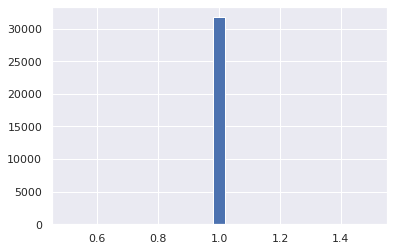

In [ ]:
#cambiopin
df2['CambioPin'].hist(bins=25)

In [ ]:
simpleImputer('CambioPin', 1.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
df2.describe(include='object').T

,count,unique,top,freq
Sexo,51124,2,H,27411


In [ ]:
#importa la libreria LabelEncoder para transformar los datos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2.Sexo = le.fit_transform(df2.Sexo)

In [ ]:
from sklearn.impute import KNNImputer
#Creamos el modelo para llevar a cabo la imputacion
imputacion = KNNImputer(n_neighbors=3)

In [ ]:
df3_knn = imputacion.fit_transform(df2)

In [ ]:
df3_knn = pd.DataFrame(df3_knn)
df3_knn.head(5)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,1.0,160.0,1.0,13.0,43.0,415064.333333,130.0,1.0,1.0,0.0,...,0.0,0.0,22000.0,0.0,702168.0,0.0,731768.0,25890.0,0.0,0.0
1,2.0,160.0,0.0,13.0,46.0,143640.000000,69.0,1.0,0.0,0.0,...,0.0,0.0,250000.0,0.0,244876.0,0.0,244876.0,284632.0,0.0,0.0
2,3.0,170.0,0.0,13.0,45.0,929106.000000,24.0,1.0,1.0,0.0,...,0.0,0.0,29990.0,0.0,94415.0,0.0,94415.0,0.0,0.0,0.0
3,4.0,151.0,0.0,13.0,46.0,172447.000000,134.0,0.0,1.0,0.0,...,0.0,0.0,80000.0,0.0,358807.0,0.0,358807.0,14660.0,0.0,0.0
4,5.0,170.0,0.0,13.0,46.0,805250.000000,116.0,0.0,1.0,1.0,...,0.0,0.0,236467.0,0.0,233331.0,0.0,67516.0,234211.0,0.0,0.0


In [ ]:
df3_knn.columns = list(df2.columns.values)
df3_knn

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1.0,160.0,1.0,13.0,43.0,415064.333333,130.0,1.0,1.0,0.0,...,0.000000,0.0,22000.000000,0.0,702168.000000,0.0,731768.0,25890.000000,0.0,0.0
1,2.0,160.0,0.0,13.0,46.0,143640.000000,69.0,1.0,0.0,0.0,...,0.000000,0.0,250000.000000,0.0,244876.000000,0.0,244876.0,284632.000000,0.0,0.0
2,3.0,170.0,0.0,13.0,45.0,929106.000000,24.0,1.0,1.0,0.0,...,0.000000,0.0,29990.000000,0.0,94415.000000,0.0,94415.0,0.000000,0.0,0.0
3,4.0,151.0,0.0,13.0,46.0,172447.000000,134.0,0.0,1.0,0.0,...,0.000000,0.0,80000.000000,0.0,358807.000000,0.0,358807.0,14660.000000,0.0,0.0
4,5.0,170.0,0.0,13.0,46.0,805250.000000,116.0,0.0,1.0,1.0,...,0.000000,0.0,236467.000000,0.0,233331.000000,0.0,67516.0,234211.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120.0,160.0,0.0,13.0,51.0,364978.000000,57.0,1.0,1.0,1.0,...,15040.000000,0.0,50000.000000,0.0,517773.000000,0.0,549787.0,34237.000000,0.0,0.0
51120,51121.0,170.0,0.0,13.0,51.0,625376.000000,39.0,1.0,0.0,0.0,...,0.000000,0.0,16358.000000,0.0,16358.000000,0.0,0.0,0.000000,0.0,0.0
51121,51122.0,160.0,0.0,13.0,47.0,806220.000000,153.0,1.0,1.0,0.0,...,0.000000,0.0,60000.000000,0.0,83495.000000,0.0,103545.0,18000.000000,0.0,0.0
51122,51123.0,160.0,1.0,13.0,47.0,757491.333333,11.0,1.0,0.0,0.0,...,93985.666667,0.0,133020.666667,0.0,676244.666667,0.0,594620.0,300331.333333,0.0,0.0


In [ ]:
#Datos nulos tratados con el metodo Knn
df3_knn.isnull().sum().sum()

0

In [ ]:
df3_knn.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
       'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
       'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12',
       'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12',
       'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12',
       'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'target'],
 

# Tratamiento de OutLiers

In [ ]:
#Con la siguiente funcion se elimnaran los datos atipicos. Pero no se eliminaran todos los Outliers si no los que estan mas elejados de lo comun ¿. 
def deleteOutliers(column_name, number):
  global df3_knn
  outliers =df3_knn[df3_knn[column_name] >= number].index
  df3_knn = df3_knn.drop(outliers)
  return print("\033[4;32m"+'OutLier(s) eliminado(s). DataFrame Actualizado!')

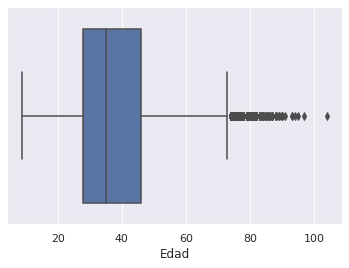

In [ ]:
#outliers Edad
sns.boxplot(x=df3_knn['Edad'])

In [ ]:
df3_knn['Edad'].sort_values(ascending= False)

35001    104.0
7295      97.0
7317      95.0
39516     94.0
7283      93.0
         ...  
34107     19.0
34108     19.0
38727     19.0
34155     19.0
35823      9.0
Name: Edad, Length: 51124, dtype: float64

In [ ]:
deleteOutliers('Edad', 104)

OutLier(s) eliminado(s). DataFrame Actualizado!


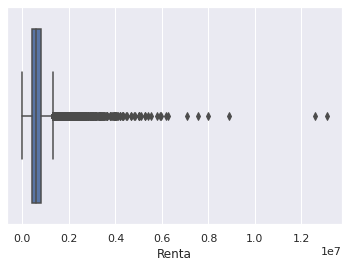

In [ ]:
#outliers Renta
sns.boxplot(x=df3_knn['Renta'])

In [ ]:
df3_knn['Renta'].sort_values(ascending= False)

43983    13089327.0
42780    12566667.0
49248     8870997.0
41236     8000000.0
48422     7529691.0
            ...    
44493           1.0
743             1.0
302             1.0
28080           1.0
47642           1.0
Name: Renta, Length: 51123, dtype: float64

In [ ]:
deleteOutliers('Renta', 12566667.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


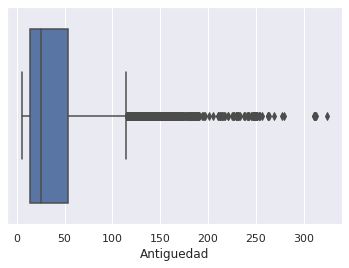

In [ ]:
#outliers Antiguedad
sns.boxplot(x=df3_knn['Antiguedad'])

In [ ]:
df3_knn['Antiguedad'].sort_values(ascending= False)

39994    324.0
39748    313.0
42596    312.0
49987    312.0
50328    312.0
         ...  
29919      6.0
21476      6.0
11779      6.0
47604      6.0
37016      6.0
Name: Antiguedad, Length: 51121, dtype: float64

In [ ]:
deleteOutliers('Antiguedad', 300)

OutLier(s) eliminado(s). DataFrame Actualizado!


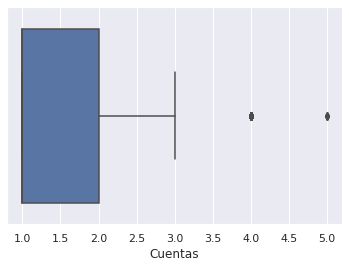

In [ ]:
#outliers cuentas
sns.boxplot(x=df3_knn['Cuentas'])

In [ ]:
df3_knn['Cuentas'].sort_values(ascending= False)

42457    5.0
16453    5.0
22154    5.0
7498     5.0
42349    5.0
        ... 
22639    1.0
22640    1.0
22643    1.0
22645    1.0
51123    1.0
Name: Cuentas, Length: 51114, dtype: float64

In [ ]:
deleteOutliers('Cuentas', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


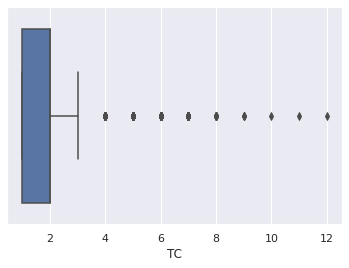

In [ ]:
#outliers T_Credito
sns.boxplot(x=df3_knn['TC'])

In [ ]:
df3_knn['TC'].sort_values(ascending= False)

2717     12.0
45663    11.0
39971    10.0
44531     9.0
40070     9.0
         ... 
31280     1.0
31278     1.0
31277     1.0
31276     1.0
35003     1.0
Name: TC, Length: 51005, dtype: float64

In [ ]:
deleteOutliers('TC', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


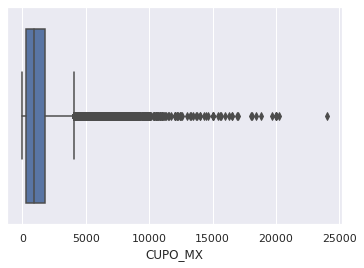

In [ ]:
#outliers
sns.boxplot(x=df3_knn['CUPO_MX'])

In [ ]:
df3_knn['CUPO_MX'].sort_values(ascending= False)

1880     24000.0
46672    20200.0
43211    20000.0
5183     20000.0
41400    20000.0
          ...   
44643        0.0
44634        0.0
6200         0.0
44604        0.0
42666        0.0
Name: CUPO_MX, Length: 48655, dtype: float64

In [ ]:
deleteOutliers('CUPO_MX', 24000.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


In [ ]:
df3_knn.shape

(48654, 67)

                   Id  Subsegmento      Sexo    Region      Edad     Renta  \
Id           1.000000     0.060151  0.020353 -0.012533  0.321090 -0.009285   
Subsegmento  0.060151     1.000000  0.030460 -0.046242 -0.526707 -0.061535   
Sexo         0.020353     0.030460  1.000000  0.019143 -0.039386 -0.104932   
Region      -0.012533    -0.046242  0.019143  1.000000  0.012790  0.006060   
Edad         0.321090    -0.526707 -0.039386  0.012790  1.000000  0.166223   
...               ...          ...       ...       ...       ...       ...   
EeccNac_T12  0.003064    -0.148722 -0.013311  0.023130  0.202796  0.126903   
EeccInt_T12 -0.000517    -0.007826 -0.002285  0.011432  0.011332  0.055365   
UsoL1_T12    0.007869    -0.151644 -0.015424  0.018307  0.209742  0.124490   
UsoL2_T12   -0.019906    -0.043050 -0.001683  0.028871  0.028692  0.035575   
UsoLI_T12    0.002329    -0.008500 -0.005235  0.010304  0.012243  0.066059   

             Antiguedad  Internauta  Adicional  Dualidad  ...  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


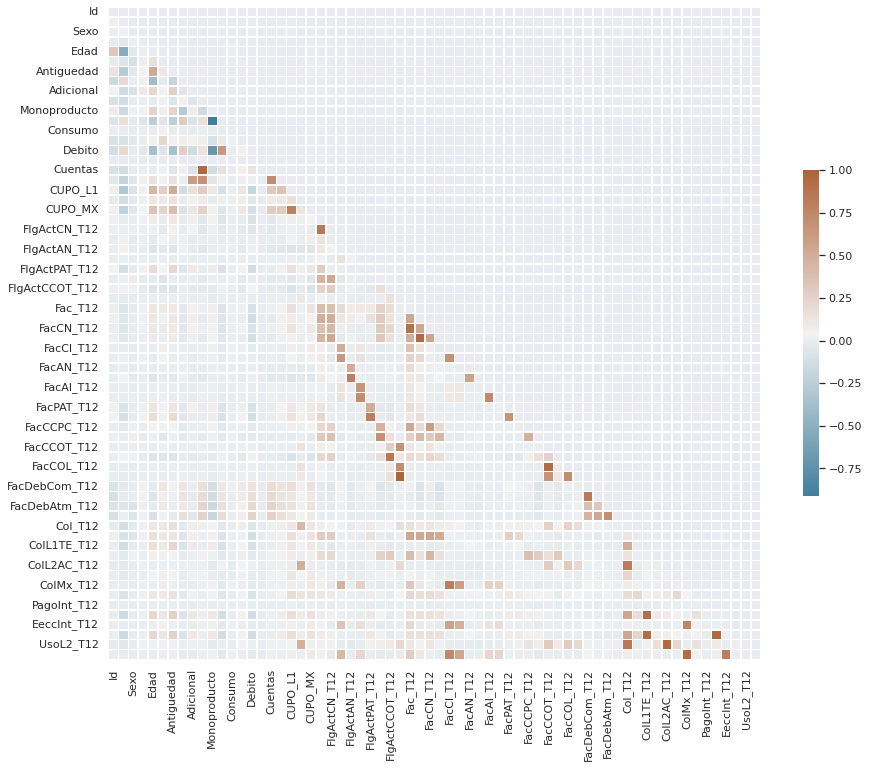

In [ ]:
import numpy as np
import seaborn as sns
# Correlación de los datos
#df1.corr()
# =============================================================================
# Correlacion
# =============================================================================

corr = df3_knn.set_index('target').corr()
print(corr)

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(15, 12))

# Generar paleta de color
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Mapa de calor con el Mask correcto
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df3_knn.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
       'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
       'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12',
       'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12',
       'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12',
       'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'target'],
 

# 4. Modelos 

In [ ]:
#Escalamiento con "escalamiento estándar" y generación de datos para "X"
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(df3_knn.drop(['Id','target','Sexo','Consumo','FlgAct_T12',],axis = 1),),
        columns=['Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 
       'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgActCN_T12','FlgActCI_T12', 'FlgActAN_T12', 
       'FlgActAI_T12', 'FlgActPAT_T12',
       'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12',
       'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12',
       'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12',
       'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12'])

In [ ]:
#Separamos la "etiqueta o clase" original
y = df3_knn.target

In [ ]:
#Dividimos los datos en el conjunto de entrenamiento y conjunto de pruebas 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) 

In [ ]:
#Estandarizamos escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Aplicando pca
#from sklearn.decomposition import PCA
#pca = PCA(n_components=4)
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# Equlibrar el balance de la etiqueta 

In [ ]:
pip install imbalanced-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

x_sm , y_sm = sm.fit_resample(x, y)

print(f'''Cambio de X antes de SMOTE: {x.shape} 
Cambio de x despues SMOTE : {x_sm.shape}''')

print('\nBalance positivo y negativo de las clases (%): ')
y_sm.value_counts(normalize=True)*100

Cambio de X antes de SMOTE: (48654, 62) 
Cambio de x despues SMOTE : (88502, 62)

Balance positivo y negativo de las clases (%): 


0.0    50.0
1.0    50.0
Name: target, dtype: float64

In [ ]:
y_sm.shape

(88502,)

# Modelos con la etiqueta equlibrada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Datos Balanceados')

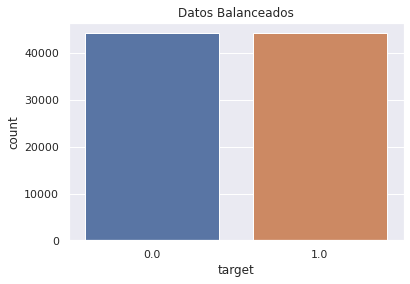

In [ ]:
#Chequeamos en balance de las etiquetas de los datos
sns.countplot(y_sm)
plt.title("Datos Balanceados")

In [ ]:
#Dividimos los datos en el conjunto de entrenamiento y conjunto de pruebas 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42) 

# Arbol DecisionTreeClassifier

In [ ]:
#Creación del modelo - Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
modelo = DecisionTreeClassifier(random_state=42)
# Entrenamiento del modelo
modelo.fit(X_train, Y_train)
# Validación del modelo
y_pred_S = modelo.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

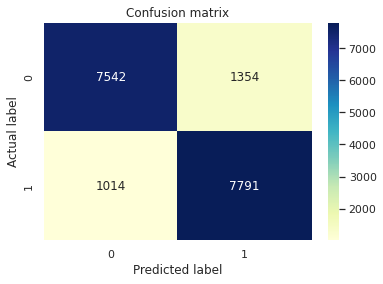

In [ ]:
#Matriz de Confusión
#Datos correctos del modelo es de 22.114 y datos fallados es de 6325
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred_S)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Reporte de métricas
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_S))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      8896
         1.0       0.85      0.88      0.87      8805

    accuracy                           0.87     17701
   macro avg       0.87      0.87      0.87     17701
weighted avg       0.87      0.87      0.87     17701



# LogisticRegression

In [ ]:
#Aplicando regresion logistica
#Modelo con regresion logística
from sklearn import linear_model
modelo2 = linear_model.LogisticRegression(max_iter=1000)
# Entrenamiento del modelo
modelo2.fit(X_train, Y_train)
# Validación del modelo
y_pred_Rl_S = modelo2.predict(X_test) 

Text(0.5, 12.5, 'Predicted label')

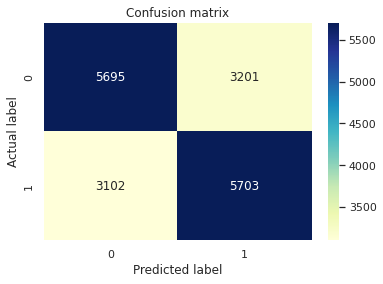

In [ ]:
#Matriz de Confusión
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred_Rl_S)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Reporte de métricas
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_Rl_S))

              precision    recall  f1-score   support

         0.0       0.65      0.64      0.64      8896
         1.0       0.64      0.65      0.64      8805

    accuracy                           0.64     17701
   macro avg       0.64      0.64      0.64     17701
weighted avg       0.64      0.64      0.64     17701



# RandomForestClassifier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
#Aplicando Random Forest Classifier
modelo3 = RandomForestClassifier(random_state=42)
# Entrenamiento del modelo
modelo3.fit(X_train, Y_train)
# Validación del modelo
y_pred_Rf_S = modelo3.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

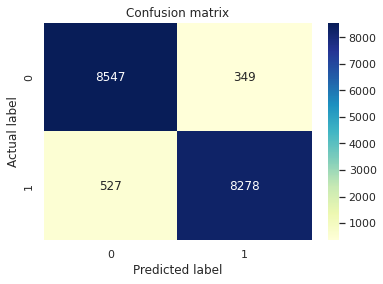

In [ ]:
#Matriz de Confusión
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred_Rf_S)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Reporte de métricas
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_Rf_S))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8896
         1.0       0.96      0.94      0.95      8805

    accuracy                           0.95     17701
   macro avg       0.95      0.95      0.95     17701
weighted avg       0.95      0.95      0.95     17701



# Modelos No Superivisado

# Modelo KMeans / Modelo 1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_ns = df3_knn[['CUPO_L2','Edad']]

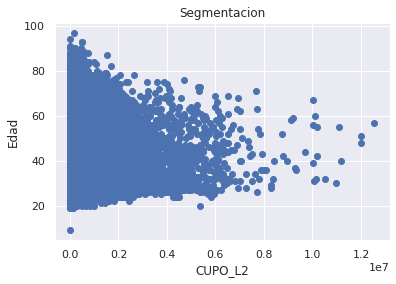

In [ ]:
# Segmentacion CUPO_L2 y Edad
x_values = df_ns.CUPO_L2
y_values = df_ns.Edad
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Segmentacion')
plt.xlabel('CUPO_L2')
plt.ylabel('Edad')
plt.show()

In [ ]:
# Ajuste del modelo a los datos reducidos en componentes principales
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_ns)

KMeans(n_clusters=3)

Text(0, 0.5, 'Edad')

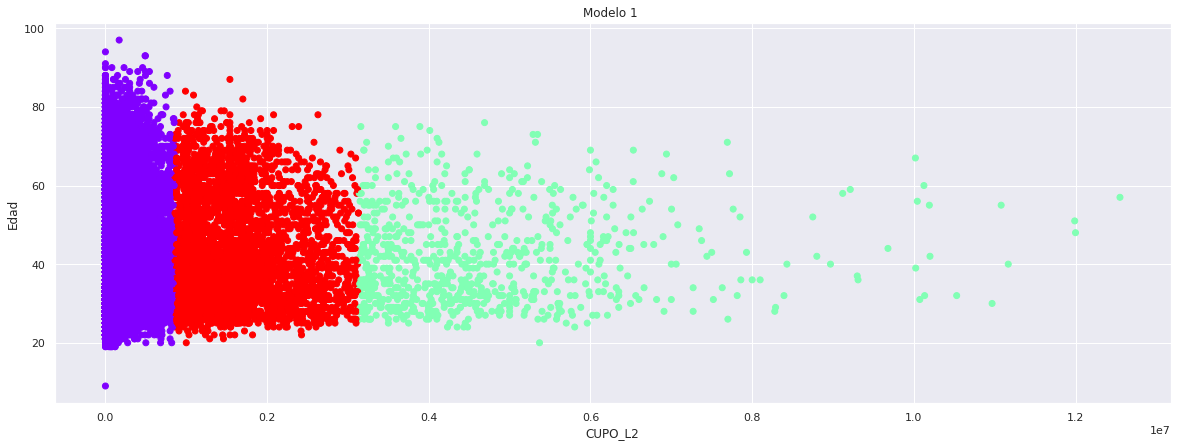

In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(20, 7))
plt.title("Modelo 1 ")
plt.scatter(df_ns['CUPO_L2'], df_ns['Edad'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("CUPO_L2")
plt.ylabel("Edad")

# Analisis de agrupación entre Edad y CUPO_L2
1. Grupo Rojo tiene una dispercion menor en la edad de los clientes a diferencia del grupo morado sin embaego los cupos asignados a cada cliente tiene un promedio de 100.000 pesos.
2. Grupo Morado tiene una gran distribucion en la edad de clientes debid que ahi es donde existen la mayor cantidad de cliente del banco, el promedio de los cupos de este grupo es de 200.000 Pesos.
3. Grupo Verde tiene una varianza aun menor a deferencia de los dos grupos anteriores pero la dispercion en los cupos asignados a cada cliente es muy grande llegando algunos clientes a cupos de 12.000.000 Pesos.
 
  

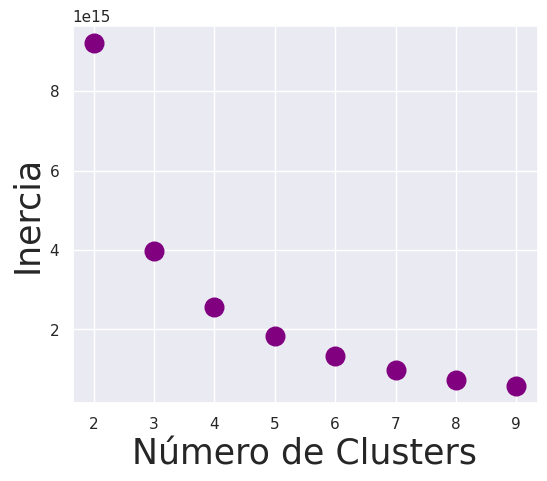

In [ ]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_ns.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()

# El numero de Cluster para este modelos es de 3

# Modelo KMeans / Modelo 2

In [ ]:
df_ns1 = df3_knn[['Antiguedad','Renta']]

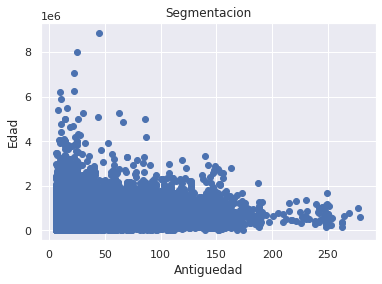

In [ ]:
# Segmentacion CUPO_L2 y Edad
x_values = df_ns1.Antiguedad
y_values = df_ns1.Renta
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Segmentacion')
plt.xlabel('Antiguedad')
plt.ylabel('Edad')
plt.show()

In [ ]:
#Entrenando segundo modelo
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_ns1)

KMeans(n_clusters=3)

Text(0, 0.5, 'Renta')

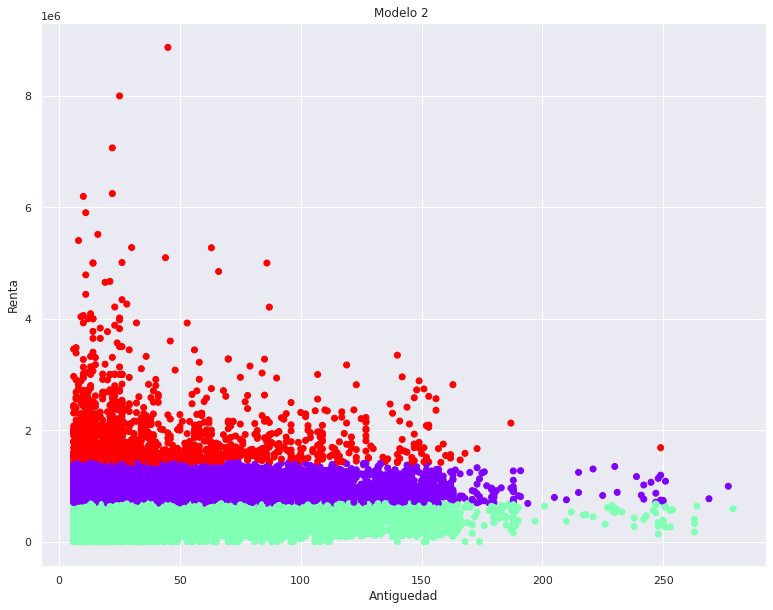

In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(13, 10))
plt.title("Modelo 2 ")
plt.scatter(df_ns1['Antiguedad'], df_ns1['Renta'], c=kmeans1.labels_, cmap='rainbow')
plt.xlabel("Antiguedad")
plt.ylabel("Renta")

# Analisis Renta y Antigüedad
1. Grupo Morado tiene una gran dispercion de datos en los meses de antiguedad de cada cliente    llegando a los 250 meses de antiguedad y con respecto a la renta no pasan los 200.000 pesos.
2. Grupo verde contienen una mayor dispercion de datos en los meses de antiquedad en el grupo anterior, respecto a la renta este grupo sigue sin sobrepasar los 200.000 pesos.
3. Grupo Rojo tienen una dispercion menor a los grupos anteriores en lo que respecto la                  antigüedad, sin embargo, la dispercion de datos en la renta de los clientes es muy grande con un promedio de 400.000 pesos y los valores mas altos llegando a mayor de 800.000.


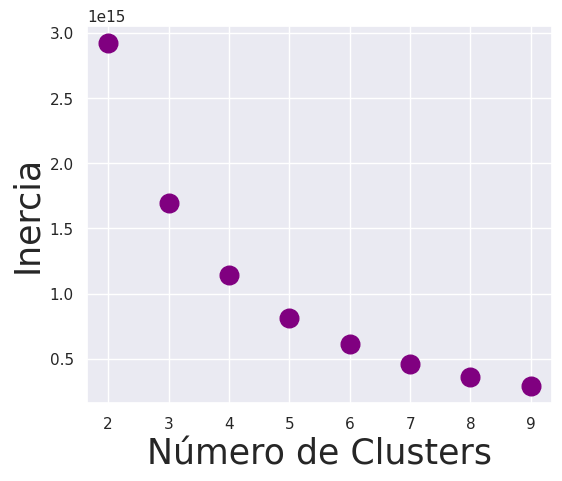

In [ ]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_ns1.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()

# Modelo KMeans / Modelo 3

In [ ]:
df_ns2 = df3_knn[['Region','Renta','Edad']]

In [ ]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_ns2)

KMeans(n_clusters=3)

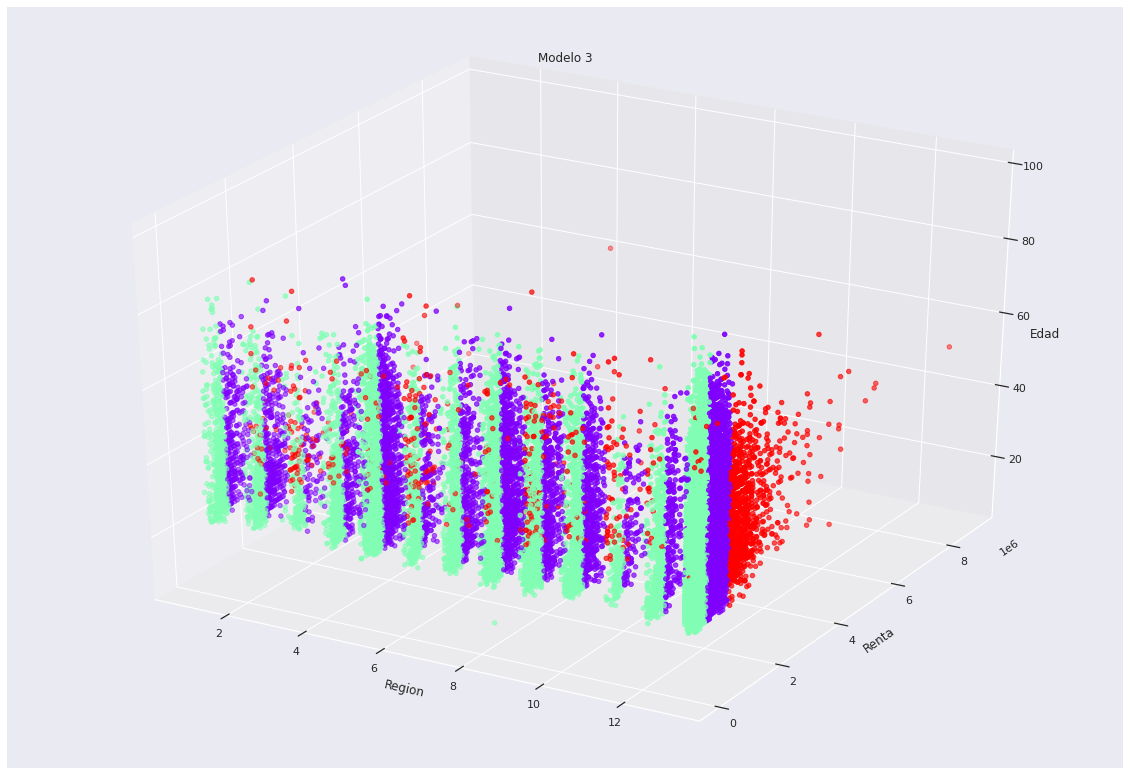

In [ ]:
fig = plt.figure(figsize=(20, 14))
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(xs = df_ns2['Region'],ys = df_ns2['Renta'], zs = df_ns2['Edad'], c=kmeans2.labels_, cmap='rainbow')


ax.set_title("Modelo 3")
ax.set_xlabel("Region")
ax.set_ylabel("Renta")
ax.set_zlabel("Edad")

plt.show()

#Aanlisis agrupacion entre Edad , Renta y Region 
1. Grupo Morado Se puede observar que la gran mayoria de os clientes cuentan con un sueldo aproximado de 200.000 pesos y la distribucion de edad es bastante alta llegando hasta los 80 años.(Poblacion mas longeva)
2. Grupo verde se puede obserc¿var que los clientes de este grupo se aproxima a la renta de 400.000 pesos  y la distribucion de edad llega hasta los 60 años.
3. Grupo Rojo se puede observar que tiene un renta superior a los 400.00 pesos hasta los 900.000 pesos y la distribucion de edad es inferior de los 60 años.

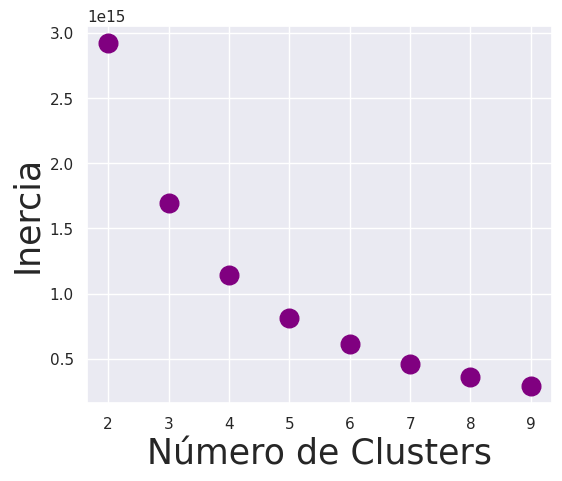

In [ ]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_ns2.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()

# 5. Evaluacion de los Modelos

Al analizar las metricas de los siguinetes modelos : Arbol de desicion , Regresion Logistica y Random forest. Logramos identificar el mejor modelo el cual es "Randon forest" con una precicion de 0.95%.
Los modelos de Arbol de desicion tiene una precicion de 0.86% y el modelo de regresion logistica con una precicion de 0.65%